## Bank Telemarketing


### Problem statement:

A money-free bank conducts a telemarketing campaign every three months to promote its term deposit product to customers. Unfortunately, the previous campaign's results did not fulfil their anticipations. The marketing director wants to start a new campaign again. To do so, they'll need a thorough analysis of previous campaigns' customer behavior. Following that, the bank can concentrate its marketing efforts on such customers. This would not only help the bank to better secure deposits, but it would also improve customer happiness by minimizing unwanted marketing for specific customers.

### Objective:

As a data scientist, you must analyse the data provided to identify which factors have a significant impact on customers' deposits and then develop a predictive model that can predict whether or not customers will subscribe to a term deposit. Figure out which customers did not deposit, even though we contacted them multiple times and took the necessary steps to ensure they did not even want to make a term deposit.


### Data Description

The data contains the different attributes of customers' term deposit. The detailed data dictionary is given below.


**Data Dictionary**

1. customer_id: unique customer ID 
2. email_id: email ID of a customer
3. first_name: first name of the customer
4. last_name: last name of the customer
5. age: age of a customer
6. job: type of job (admin,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown)
7. marital_status: marital status (divorced, married, single, unknown) 
8. education: education (basic_4y,basic_6y,basic_9y,high_school,illiterate,professional_course,university_degree,unknown)
9. defaulter: has credit in default (yes,unknown,no)
10. home_loan: customer has home loan? (yes,no,unknown)
11. personal_loan: customer has personal loan? (yes,no,unknown)
12. communication_type: customer contact communication type (cellular, telephone)
13. last_contacted: customer last contacted month (mar,apr,may,jun,jul,aug,sep,oct,nov,dec)
14. day_of_week: last contact day of the week (mon,tue,wed,thu,fri)
15. duration: last contact duration in seconds
16. cc_contact_freq: number of contacts performed in the current campaign.
17. days_since_pc: number of days that passed by after the client was last contacted from a previous campaign.
18. pc_contact_freq: number of contacts performed before this campaign.
19. pc_outcome: previous campaign outcome (failure, nonexistent, success)
20. consumer_price_index: consumer price index 
(example: When the CPI is rising it means that consumer prices are also rising, and when it falls it means consumer prices are generally falling. In short, a higher CPI indicates higher inflation, while a falling CPI indicates lower inflation, or even deflation)
21. euro_interbank_offer_rate:  Euro Interbank Offer Rate (It is a reference rate that is constructed from the average interest rate at which eurozone banks offer unsecured short-term lending on the inter-bank market)
22. subscribed: has the customer subscribed a term deposit? (yes, no)

#### Note: cc refers to current campaign,pc refers to previous campaign.
#### Note: If you stuck at somewhere , refer MLS session and videos.

## Importing necessary libraries and data

In [1]:
# To filter the warnings
import warnings

warnings.filterwarnings("ignore")

#importing relevant libraries
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split

# To build linear model for statistical analysis and prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

# To get diferent metric scores
from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_curve, confusion_matrix, roc_auc_score

# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To perform statistical analysis
import scipy.stats as stats

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    plot_confusion_matrix,
    make_scorer,
)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist
from scipy.stats import zscore

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

In [2]:
#Loading the dataset
bank_data = pd.read_csv("Bank_Telemarketing.csv")

## Data Overview

- Observations
- Shape of the data
- Data types
- Description

In [3]:
#Viewing the first 5 rows of the datatset
bank_data.head(5)

customer_id                email_id first_name last_name  age  \
0  61e41ab36fb571a283ba252b     jared84@example.org      Aaron    Austin   56   
1  61e41ab36fb571a283ba252c    gsanchez@example.net      Aaron      Gray   57   
2  61e41ab36fb571a283ba252d    donald41@example.net      Aaron    Walker   37   
3  61e41ab36fb571a283ba252e     ariel87@example.com      Aaron   Shelton   40   
4  61e41ab36fb571a283ba252f  thomasjeff@example.com      Aaron   Johnson   56   

         job marital_status    education defaulter home_loan  ...  \
0  housemaid        married     basic.4y        no        no  ...   
1   services        married  high.school   unknown        no  ...   
2   services        married  high.school        no       yes  ...   
3     admin.        married     basic.6y        no        no  ...   
4   services        married  high.school        no        no  ...   

  last_contacted day_of_week duration cc_contact_freq  days_since_pc  \
0            may         mon      261               1              0   
1            may         mon      149               1              0   
2            may         mon      226               1              0   
3            may         mon      151               1              0   
4            may         mon      307               1              0   

   pc_contact_freq   pc_outcome  consumer_price_index  \
0                0  nonexistent                93.994   
1                0  nonexistent                93.994   
2                0  nonexistent                93.994   
3                0  nonexistent                93.994   
4                0  nonexistent                93.994   

  euro_interbank_offer_rate  subscribed  
0                     4.857          no  
1                     4.857          no  
2                     4.857          no  
3                     4.857          no  
4                     4.857          no  

[5 rows x 22 columns]

In [4]:
bank_data.shape

(41183, 22)

There are total 22 columns and 41183 observations in the dataset.

In [5]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41183 entries, 0 to 41182
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customer_id                41183 non-null  object 
 1   email_id                   41183 non-null  object 
 2   first_name                 41183 non-null  object 
 3   last_name                  41183 non-null  object 
 4   age                        41183 non-null  int64  
 5   job                        41183 non-null  object 
 6   marital_status             41183 non-null  object 
 7   education                  41183 non-null  object 
 8   defaulter                  41183 non-null  object 
 9   home_loan                  41183 non-null  object 
 10  personal_loan              41183 non-null  object 
 11  communication_type         41183 non-null  object 
 12  last_contacted             41183 non-null  object 
 13  day_of_week                41183 non-null  obj

There are 15 object type, 2 float type and 5 integer type columns in the dataset. There are no missing values observed in the dataset as seen above

In [6]:
bank_data.describe()

age      duration  cc_contact_freq  days_since_pc  \
count  41183.000000  41183.000000     41183.000000   41183.000000   
mean      40.026856    258.265376         2.567637       0.221014   
std       10.418794    259.270273         2.770166       1.348670   
min       18.000000      0.000000         1.000000       0.000000   
25%       32.000000    102.000000         1.000000       0.000000   
50%       38.000000    180.000000         2.000000       0.000000   
75%       47.000000    319.000000         3.000000       0.000000   
max       98.000000   4918.000000        56.000000      27.000000   

       pc_contact_freq  consumer_price_index  euro_interbank_offer_rate  
count     41183.000000          41183.000000               41183.000000  
mean          0.172765             93.575826                   3.621628  
std           0.494587              0.578689                   1.734283  
min           0.000000             92.201000                   0.634000  
25%           0.000000             93.075000                   1.344000  
50%           0.000000             93.749000                   4.857000  
75%           0.000000             93.994000                   4.961000  
max           7.000000             94.767000                   5.045000

The mean age and last contact duration time of customers is approximately 40 years and 258 seconds. On average, there are approximately 3 contacts performed in the current campaign and 0.22 days (5 hours) since clients were last contacted for the previous campaign. The average consumer price index and Euro interbank offer rate is approximately 93.6 and 3.62 respectively.

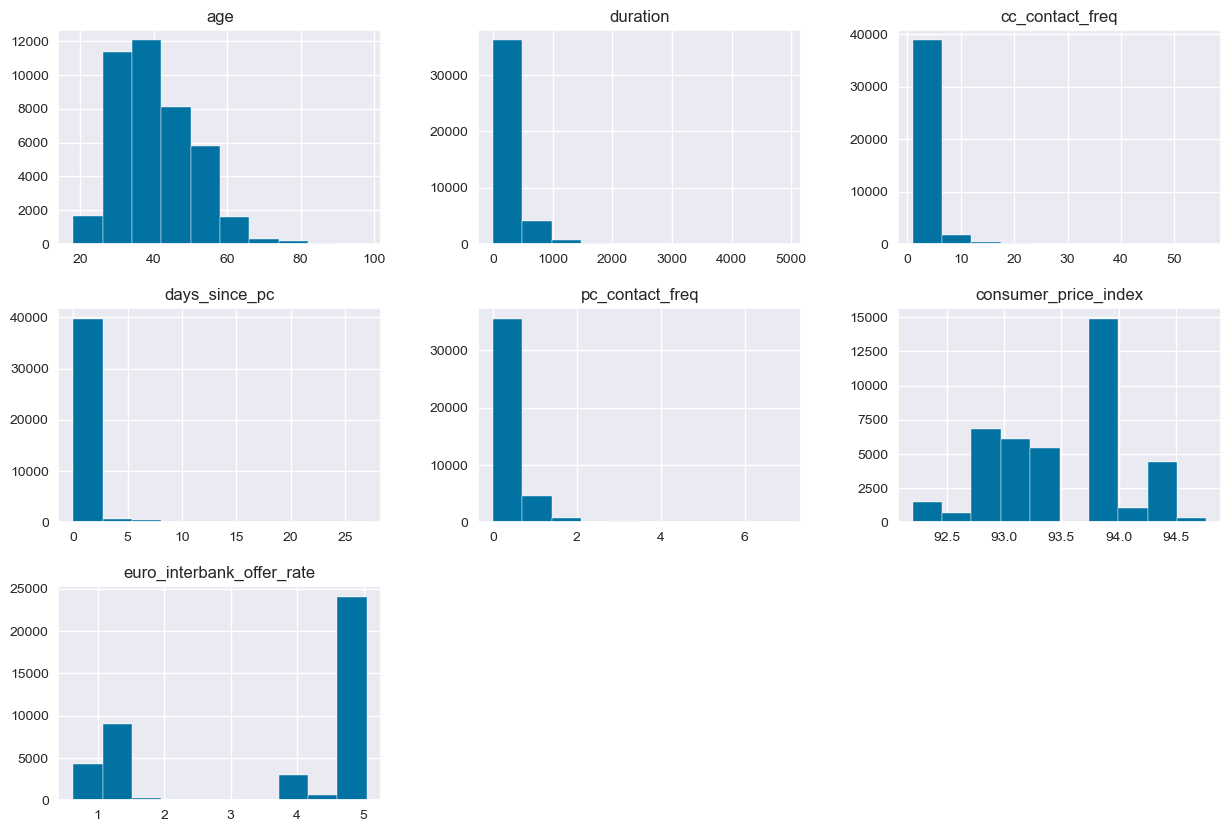

In [7]:
sns.set_style("darkgrid")
bank_data.hist(figsize=(15,10))
plt.show()

The bank has customers with ages ranging from 20 - 80, with majority being within age 30 - 60. Majority of the customers are contacted for a duration of at least 500 seconds. The bank contacted less customers in the previous campaign than in the current one. Most customers were contacted within 2.5 days in the previous campaign and the highest number of customers, about 15,000 had a consumer price index of approximately 94.0, with most customers (about 24,000) having an Euro interbank offer rate of approximately 5.

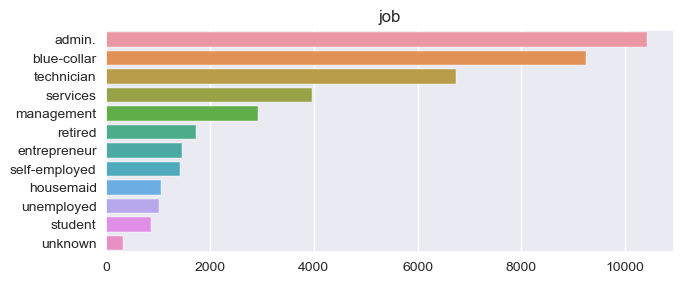

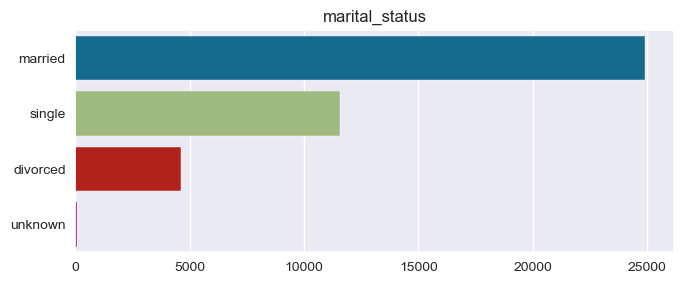

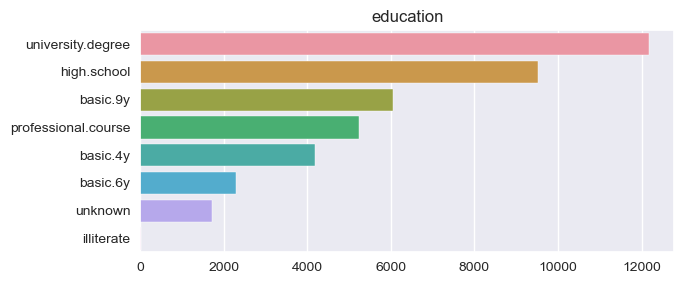

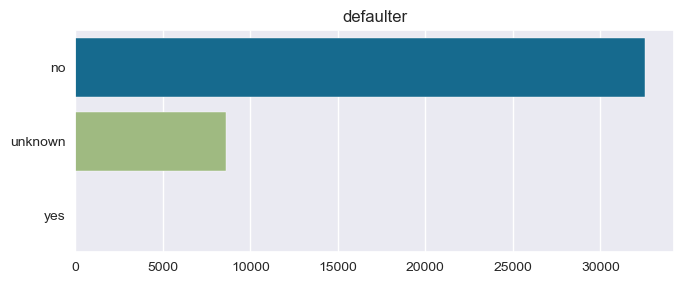

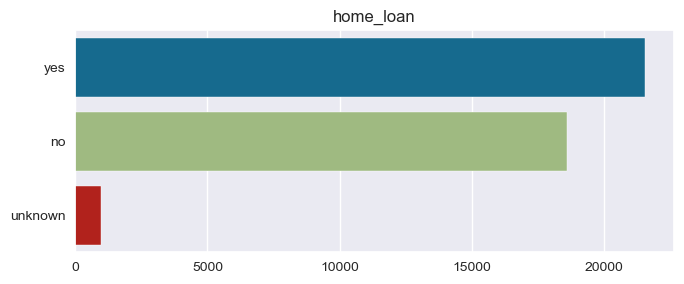

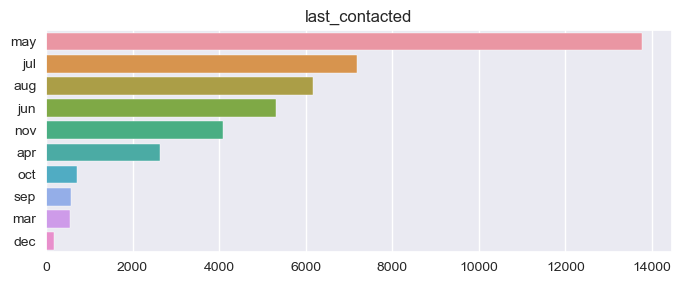

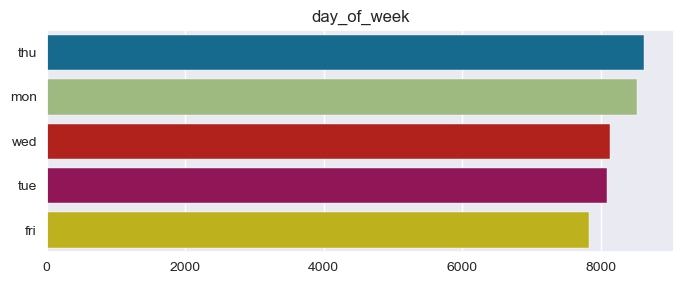

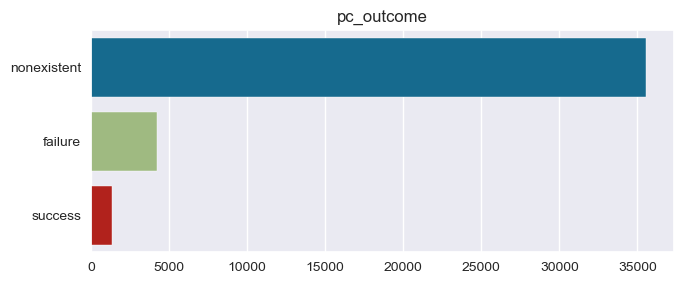

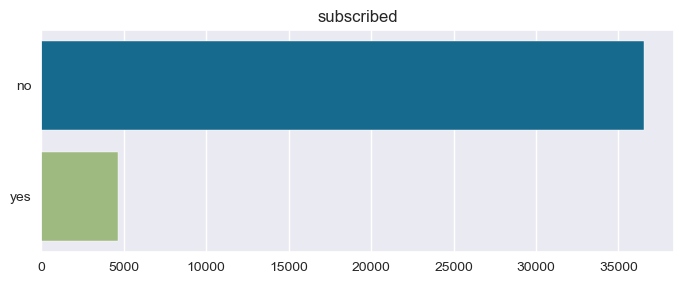

In [8]:
categorical_variables = ['job', 'marital_status', 'education', 'defaulter', 'home_loan', 'last_contacted', 
                     'day_of_week', 'pc_outcome','subscribed']
for col in categorical_variables:
    plt.figure(figsize=(7,3))
    sns.barplot(bank_data[col].value_counts().values, bank_data[col].value_counts().index)
    plt.title(col)
    plt.tight_layout()

A greater number of the bank's customers have admin, blue-collar, technician and service jobs. A vast number of their customers (more than half) are married, while the rest are single, divorced or unknown. The highest number of customers in the bank have a university degree and high school diploma. Majority of the customers have had no credit default with the rest being unknown. A lot of customers have home loans, which means they have houses; while the rest have no home loans or their loan status is unknown. Most customer's were contacted in the month of May which is the height of summer and the lease in December (winter). Calls were evenly distributed from Monday to Friday. Most contacts that performed in the previous campaign were nonexistent, with a higher failure rate than success. The number of customers that subscribed was way less than the number that did, hence the failure of the campaign.

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Preparing data for modeling (Train test split)
- Dropping unnecessary columns
- Any other preprocessing steps (if needed)


**Note: Write the observations from the outliers columns but don't treat them because the data is accurate, but treating them may influence the model's performance.**

In [9]:
#Converting the columns with an 'object' datatype into categorical variables
for feature in bank_data.columns: # Loop through all columns in the dataframe
    if bank_data[feature].dtype == 'object': # Only apply for columns with categorical strings
        bank_data[feature] = pd.Categorical(bank_data[feature])# Replace strings with an integer
bank_data.head(5)

customer_id                email_id first_name last_name  age  \
0  61e41ab36fb571a283ba252b     jared84@example.org      Aaron    Austin   56   
1  61e41ab36fb571a283ba252c    gsanchez@example.net      Aaron      Gray   57   
2  61e41ab36fb571a283ba252d    donald41@example.net      Aaron    Walker   37   
3  61e41ab36fb571a283ba252e     ariel87@example.com      Aaron   Shelton   40   
4  61e41ab36fb571a283ba252f  thomasjeff@example.com      Aaron   Johnson   56   

         job marital_status    education defaulter home_loan  ...  \
0  housemaid        married     basic.4y        no        no  ...   
1   services        married  high.school   unknown        no  ...   
2   services        married  high.school        no       yes  ...   
3     admin.        married     basic.6y        no        no  ...   
4   services        married  high.school        no        no  ...   

  last_contacted day_of_week duration cc_contact_freq  days_since_pc  \
0            may         mon      261               1              0   
1            may         mon      149               1              0   
2            may         mon      226               1              0   
3            may         mon      151               1              0   
4            may         mon      307               1              0   

   pc_contact_freq   pc_outcome  consumer_price_index  \
0                0  nonexistent                93.994   
1                0  nonexistent                93.994   
2                0  nonexistent                93.994   
3                0  nonexistent                93.994   
4                0  nonexistent                93.994   

  euro_interbank_offer_rate  subscribed  
0                     4.857          no  
1                     4.857          no  
2                     4.857          no  
3                     4.857          no  
4                     4.857          no  

[5 rows x 22 columns]

In [10]:
bank_data.copy()

customer_id                  email_id first_name  \
0      61e41ab36fb571a283ba252b       jared84@example.org      Aaron   
1      61e41ab36fb571a283ba252c      gsanchez@example.net      Aaron   
2      61e41ab36fb571a283ba252d      donald41@example.net      Aaron   
3      61e41ab36fb571a283ba252e       ariel87@example.com      Aaron   
4      61e41ab36fb571a283ba252f    thomasjeff@example.com      Aaron   
...                         ...                       ...        ...   
41178  61e41ab76fb571a283bac60a   davidadkins@example.net      Roger   
41179  61e41ab76fb571a283bac60b  kristyashley@example.com      Roger   
41180  61e41ab76fb571a283bac60c    saraholson@example.net      Roger   
41181  61e41ab76fb571a283bac60d  cordovajoyce@example.org      Roger   
41182  61e41ab76fb571a283bac60e    evansjames@example.com      Roger   

       last_name  age          job marital_status            education  \
0         Austin   56    housemaid        married             basic.4y   
1           Gray   57     services        married          high.school   
2         Walker   37     services        married          high.school   
3        Shelton   40       admin.        married             basic.6y   
4        Johnson   56     services        married          high.school   
...          ...  ...          ...            ...                  ...   
41178        Kim   73      retired        married  professional.course   
41179     Wilson   46  blue-collar        married  professional.course   
41180      Price   56      retired        married    university.degree   
41181     Bowers   44   technician        married  professional.course   
41182  Jefferson   74      retired        married  professional.course   

      defaulter home_loan  ... last_contacted day_of_week duration  \
0            no        no  ...            may         mon      261   
1       unknown        no  ...            may         mon      149   
2            no       yes  ...            may         mon      226   
3            no        no  ...            may         mon      151   
4            no        no  ...            may         mon      307   
...         ...       ...  ...            ...         ...      ...   
41178        no       yes  ...            nov         fri      334   
41179        no        no  ...            nov         fri      383   
41180        no       yes  ...            nov         fri      189   
41181        no        no  ...            nov         fri      442   
41182        no       yes  ...            nov         fri      239   

      cc_contact_freq  days_since_pc  pc_contact_freq   pc_outcome  \
0                   1              0                0  nonexistent   
1                   1              0                0  nonexistent   
2                   1              0                0  nonexistent   
3                   1              0                0  nonexistent   
4                   1              0                0  nonexistent   
...               ...            ...              ...          ...   
41178               1              0                0  nonexistent   
41179               1              0                0  nonexistent   
41180               2              0                0  nonexistent   
41181               1              0                0  nonexistent   
41182               3              0                1      failure   

       consumer_price_index euro_interbank_offer_rate  subscribed  
0                    93.994                     4.857          no  
1                    93.994                     4.857          no  
2                    93.994                     4.857          no  
3                    93.994                     4.857          no  
4                    93.994                     4.857          no  
...                     ...                       ...         ...  
41178                94.767                     1.028         yes  
41179                94.767             

In [11]:
#Dropping unnecessary columns
#Dropping the 'customer_id','email_id','first_name, 'last name' columns for prediction purposes.
bank_data = bank_data.drop(['customer_id','email_id','first_name','last_name'], axis=1)

In [12]:
#Dropping previous campaign info columns
bank_data = bank_data.drop(['pc_contact_freq','days_since_pc','pc_outcome'], axis=1)

In [13]:
#Dropping duplicate rows
l0 = bank_data.shape[0]
bank_data.drop_duplicates(inplace=True)
l1 = bank_data.shape[0]
print(f'{l0-l1} rows were dropped.')

13 rows were dropped.


In [14]:
bank_data.nunique()

age                            77
job                            12
marital_status                  4
education                       8
defaulter                       3
home_loan                       3
personal_loan                   3
communication_type              2
last_contacted                 10
day_of_week                     5
duration                     1544
cc_contact_freq                42
consumer_price_index           26
euro_interbank_offer_rate     316
subscribed                      2
dtype: int64

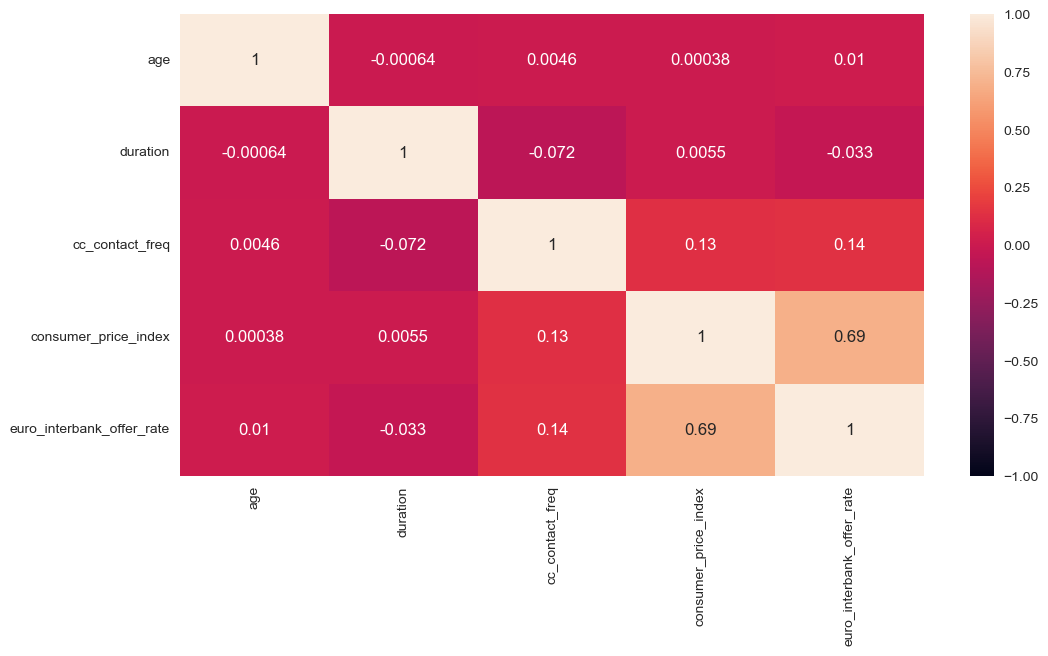

In [17]:
plt.figure(figsize=(12, 6))
sns.heatmap(bank_data.corr(), annot=True, vmin=-1, vmax=1)
plt.show()

No significant case of high correlation among the variables observed.

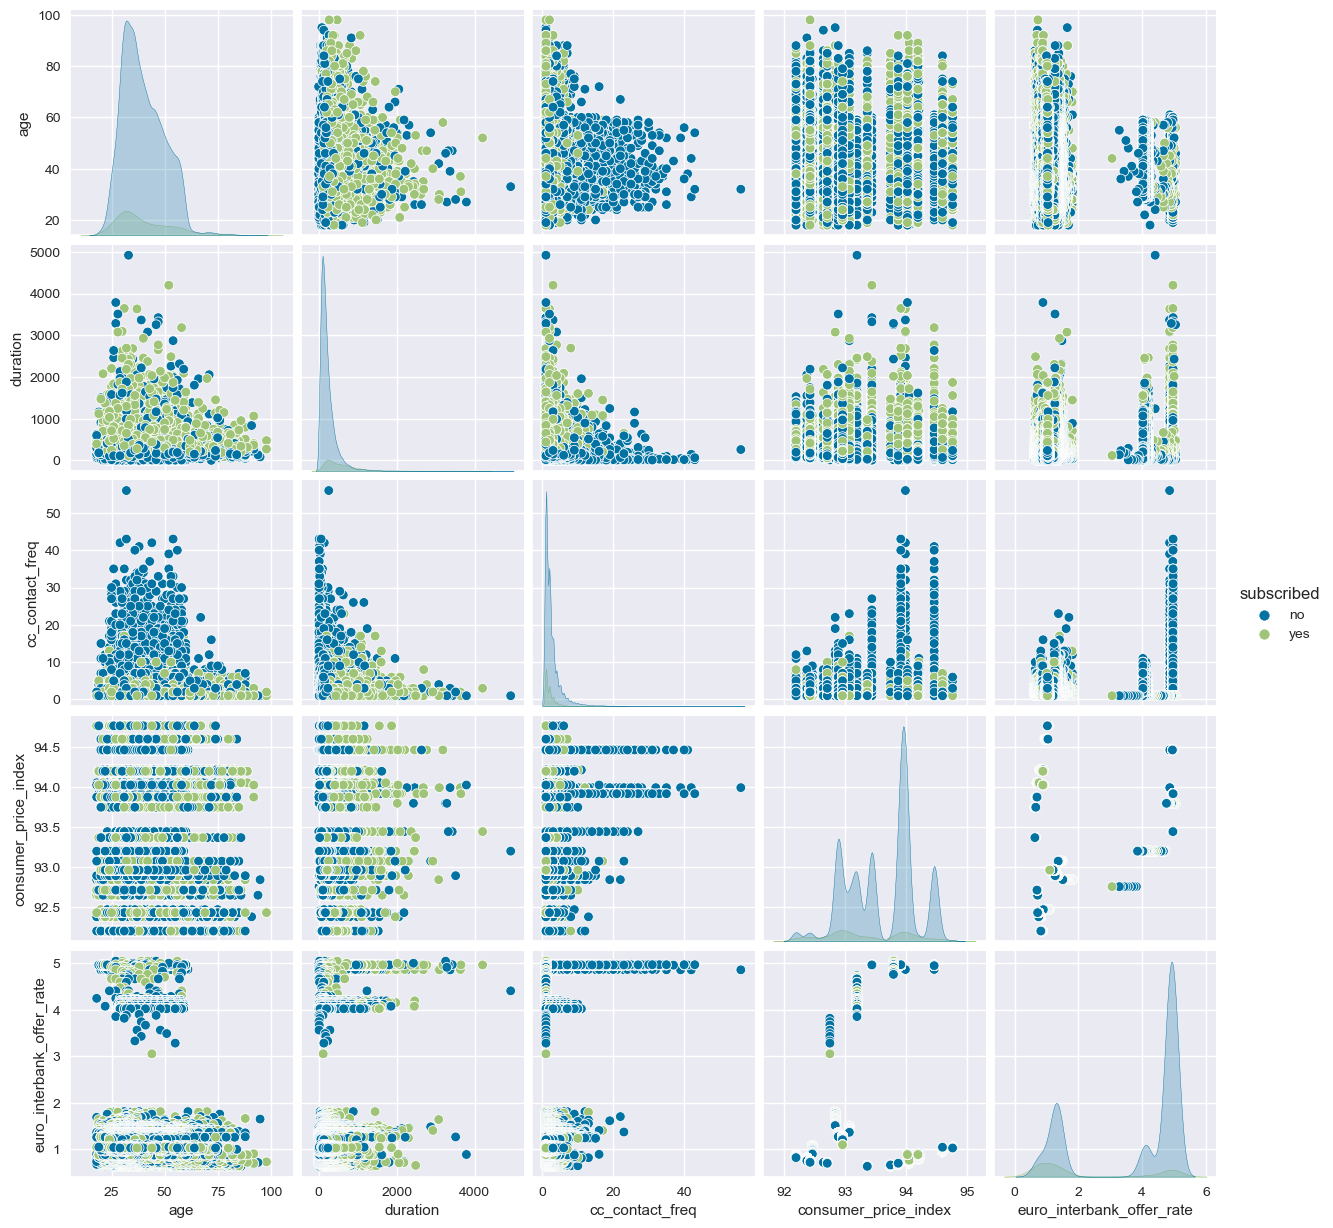

In [18]:
sns.pairplot(bank_data, hue="subscribed")
plt.show()

No significant patterns observed.

In [19]:
#Target/dependent variable
bank_data["subscribed"].value_counts()

no     36533
yes     4637
Name: subscribed, dtype: int64

In [20]:
bank_data["subscribed"].value_counts(1)

no     0.887369
yes    0.112631
Name: subscribed, dtype: float64

The number of observations where the customer subscribed is 4638 which represents approximately 11% of the total number, while the number of observations where the customer did not subscribe is 36545 which is approximately 89% of the total number hence the failure of the previous campaign.

In [21]:
#label encoding for all categorical data
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
bank_data['job'] = label_encoder.fit_transform(bank_data['job'])
bank_data['marital_status'] = label_encoder.fit_transform(bank_data['marital_status'])
bank_data['education'] = label_encoder.fit_transform(bank_data['education'])
bank_data['defaulter'] = label_encoder.fit_transform(bank_data['defaulter'])
bank_data['home_loan'] = label_encoder.fit_transform(bank_data['home_loan'])
bank_data['personal_loan'] = label_encoder.fit_transform(bank_data['personal_loan'])
bank_data['communication_type'] = label_encoder.fit_transform(bank_data['communication_type'])
bank_data['last_contacted'] = label_encoder.fit_transform(bank_data['last_contacted'])
bank_data['day_of_week'] = label_encoder.fit_transform(bank_data['day_of_week'])
bank_data['subscribed'] = label_encoder.fit_transform(bank_data['subscribed'])

In [22]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41170 entries, 0 to 41182
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        41170 non-null  int64  
 1   job                        41170 non-null  int32  
 2   marital_status             41170 non-null  int32  
 3   education                  41170 non-null  int32  
 4   defaulter                  41170 non-null  int32  
 5   home_loan                  41170 non-null  int32  
 6   personal_loan              41170 non-null  int32  
 7   communication_type         41170 non-null  int32  
 8   last_contacted             41170 non-null  int32  
 9   day_of_week                41170 non-null  int32  
 10  duration                   41170 non-null  int64  
 11  cc_contact_freq            41170 non-null  int64  
 12  consumer_price_index       41170 non-null  float64
 13  euro_interbank_offer_rate  41170 non-null  flo

In [23]:
#Splitting data into train and test
X = bank_data.drop(["subscribed"], axis=1)
Y = bank_data["subscribed"]

# adding a contstant to X variable
X = add_constant(X)

# creating dummies
X = pd.get_dummies(X, drop_first=True)


# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1, stratify=Y
)

In [24]:
# fitting logistic regression model
logit = sm.Logit(y_train, X_train.astype(float))
lg = logit.fit(disp=False)

print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:             subscribed   No. Observations:                28819
Model:                          Logit   Df Residuals:                    28804
Method:                           MLE   Df Model:                           14
Date:                Thu, 12 Jan 2023   Pseudo R-squ.:                  0.3434
Time:                        22:33:27   Log-Likelihood:                -6660.0
converged:                       True   LL-Null:                       -10144.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                       -54.1241      4.142    -13.068      0.000     -62.242     -46.006
age                           0.0163      0.002      7.752      0.000       0.012     

## Building a Logistic Regression model

In [25]:
# fitting logistic regression model
logit = sm.Logit(y_train, X_train.astype(float))
lg = logit.fit()

Optimization terminated successfully.
         Current function value: 0.231098
         Iterations 8


In [26]:
#Printing the logistic regression summary
print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:             subscribed   No. Observations:                28819
Model:                          Logit   Df Residuals:                    28804
Method:                           MLE   Df Model:                           14
Date:                Thu, 12 Jan 2023   Pseudo R-squ.:                  0.3434
Time:                        22:35:35   Log-Likelihood:                -6660.0
converged:                       True   LL-Null:                       -10144.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                       -54.1241      4.142    -13.068      0.000     -62.242     -46.006
age                           0.0163      0.002      7.752      0.000       0.012     

In [27]:
#Checking the model performance
# predicting on training set
# default threshold is 0.5, if predicted probability is greater than 0.5 the observation will be classified as 1

pred_train = lg.predict(X_train) > 0.5
pred_train = np.round(pred_train)

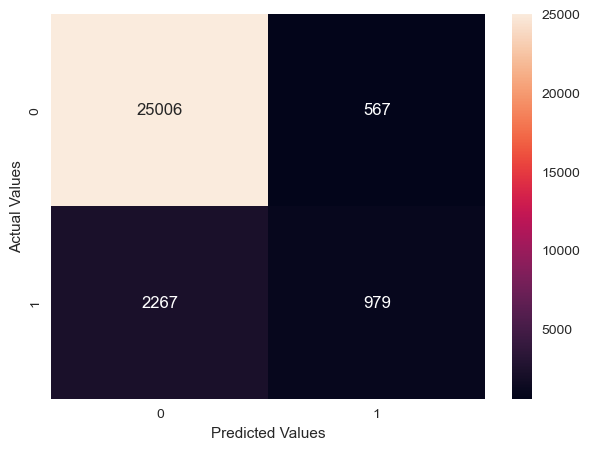

In [30]:
cm = confusion_matrix(y_train, pred_train)
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt="g")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

True Positives (TP): The customer will subscribe and the model predicts that the customer will subscribe. True Negatives (TN): The customer will not subscribe and the model predicts that the customer will not subscribe. False Positives (FP): The customer subscribed and the model predicted that the customer will not subscribe. False Negatives (FN): The customer did not subscribe and the model predicted that the customer will subscribe.

In [31]:
#Checking model accuracy
print("Accuracy on training set : ", accuracy_score(y_train, pred_train))

Accuracy on training set :  0.9016620979215101


In [ ]:
The model appears to be performing very well on the training set.

## Checking Multicollinearity

- In order to make statistical inferences from a logistic regression model, it is important to ensure that there is no multicollinearity present in the data.

In [32]:
#Checking the VIF of the predictors
vif_series = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
    dtype=float,
)
print("VIF values: \n\n{}\n".format(vif_series))

VIF values: 

const                        64372.877477
age                              1.213107
job                              1.020187
marital_status                   1.195343
education                        1.083362
defaulter                        1.107348
home_loan                        1.010527
personal_loan                    1.002438
communication_type               1.759924
last_contacted                   1.181110
day_of_week                      1.006954
duration                         1.009061
cc_contact_freq                  1.030672
consumer_price_index             2.492178
euro_interbank_offer_rate        2.014517
dtype: float64



There appears to be multicollinearity in the model

In [33]:
#Removing insignificant variables (p-values>0.05)
# summary of initial logistic regression model
print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:             subscribed   No. Observations:                28819
Model:                          Logit   Df Residuals:                    28804
Method:                           MLE   Df Model:                           14
Date:                Thu, 12 Jan 2023   Pseudo R-squ.:                  0.3434
Time:                        22:39:28   Log-Likelihood:                -6660.0
converged:                       True   LL-Null:                       -10144.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                       -54.1241      4.142    -13.068      0.000     -62.242     -46.006
age                           0.0163      0.002      7.752      0.000       0.012     

In [34]:
#Dropping personal_loan as it has the highest p-value
X_train1 = X_train.drop("home_loan", axis=1)

In [35]:
# fitting the model on training set
logit1 = sm.Logit(y_train, X_train1.astype(float))
lg1 = logit1.fit()

pred_train1 = lg1.predict(X_train1)
pred_train1 = np.round(pred_train1)


print("Accuracy on training set : ", accuracy_score(y_train, pred_train1))

Optimization terminated successfully.
         Current function value: 0.231109
         Iterations 8
Accuracy on training set :  0.9018702939033276


There is no significant change in the model performance as compared to initial model.

In [36]:
# checking summary of the model
print(lg1.summary())

                           Logit Regression Results                           
Dep. Variable:             subscribed   No. Observations:                28819
Model:                          Logit   Df Residuals:                    28805
Method:                           MLE   Df Model:                           13
Date:                Thu, 12 Jan 2023   Pseudo R-squ.:                  0.3434
Time:                        22:41:31   Log-Likelihood:                -6660.3
converged:                       True   LL-Null:                       -10144.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                       -54.1298      4.141    -13.071      0.000     -62.247     -46.013
age                           0.0163      0.002      7.754      0.000       0.012     

In [37]:
#dropping home_loan with the next highest p-value
X_train2 = X_train1.drop("personal_loan", axis=1)

In [38]:
# fitting the model on training set
logit2 = sm.Logit(y_train, X_train2.astype(float))
lg2 = logit2.fit()

pred_train2 = lg2.predict(X_train2)
pred_train2 = np.round(pred_train2)

print("Accuracy on training set : ", accuracy_score(y_train, pred_train2))

Optimization terminated successfully.
         Current function value: 0.231140
         Iterations 8
Accuracy on training set :  0.9017661959124189


There is no significant change in the model performance as compared to initial model.

In [39]:
## checking summary of the model
print(lg2.summary())

                           Logit Regression Results                           
Dep. Variable:             subscribed   No. Observations:                28819
Model:                          Logit   Df Residuals:                    28806
Method:                           MLE   Df Model:                           12
Date:                Thu, 12 Jan 2023   Pseudo R-squ.:                  0.3433
Time:                        22:43:01   Log-Likelihood:                -6661.2
converged:                       True   LL-Null:                       -10144.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                       -54.1043      4.141    -13.066      0.000     -62.220     -45.989
age                           0.0163      0.002      7.749      0.000       0.012     

All the columns left are significant predictors.

## Coefficient interpretations

In [40]:
#Converting coefficients to odds
odds = np.exp(lg2.params)

# adding the odds to a dataframe
pd.DataFrame(odds, X_train2.columns, columns=["odds"]).T

const       age      job  marital_status  education  defaulter  \
odds  3.182691e-24  1.016461  1.01836        1.223719   1.089819   0.535663   

      communication_type  last_contacted  day_of_week  duration  \
odds            0.671901         0.97135     1.067932  1.004481   

      cc_contact_freq  consumer_price_index  euro_interbank_offer_rate  
odds         0.943417              1.736215                   0.491645

In [41]:
# finding the percentage change
perc_change_odds = (np.exp(lg2.params) - 1) * 100

# adding the change_odds% to a dataframe
pd.DataFrame(perc_change_odds, X_train2.columns, columns=["change_odds%"]).T

const      age       job  marital_status  education  defaulter  \
change_odds% -100.0  1.64607  1.836042       22.371931   8.981902 -46.433721   

              communication_type  last_contacted  day_of_week  duration  \
change_odds%          -32.809937       -2.864989     6.793166  0.448111   

              cc_contact_freq  consumer_price_index  euro_interbank_offer_rate  
change_odds%        -5.658298              73.62153                 -50.835528

-Coefficient interpretations:

Age: Holding all other features constant, a unit change in the customer's age will increase the odds of a customer subscribing by approximately 1.01 times. 
Job: Holding all other features constant, a unit change in the customer's job will increase the odds of a customer subscribing by 1.01 times. 
Marital_status: Holding all other features constant, a unit change in the customer's marital status will increase the odds of a customer subscribing by approximately 1.17 times. 
Education: Holding all other features constant, a unit change in the customer's education will increase the odds of a customer subscribing by 1.1 times. 
Defaulter: Holding all other features constant, a unit change in defaulters will increase the odds of a customer subscribing by approximately 0.6 times. 
Communication_type: Holding all other features constant, a unit change in the communication type will increase the odds of a customer subscribing by approximately 0.7 times. 
last_contacted: Holding all other features constant, a unit change in the time the client was last contacted will increase the odds of a customer subscribing by 0.97 times. 
Day_of_week: Holding all other features constant, a unit change in the day of the week the client is contacted will increase the odds of a customer subscribing by approximately 1.1 times. 
Consumer_price_index: Holding all other features constant, a unit change in the customer's consumer_price_index will increase the odds of a customer subscribing by 1.76 times.

## Model performance evaluation

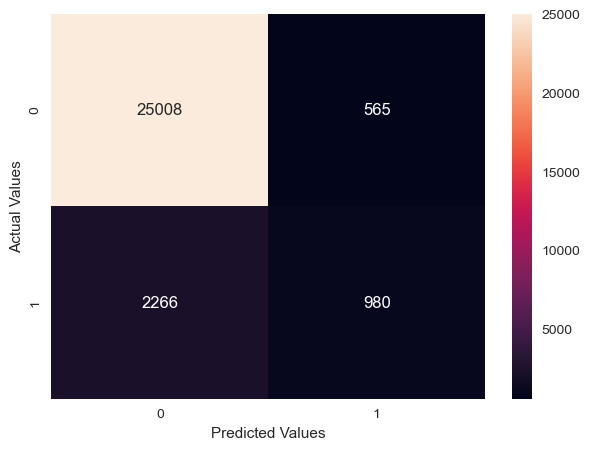

In [42]:
cm = confusion_matrix(y_train, pred_train2)
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt="g")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

In [43]:
#Accuracy on training set
print("Accuracy on training set : ", accuracy_score(y_train, pred_train2))

Accuracy on training set :  0.9017661959124189


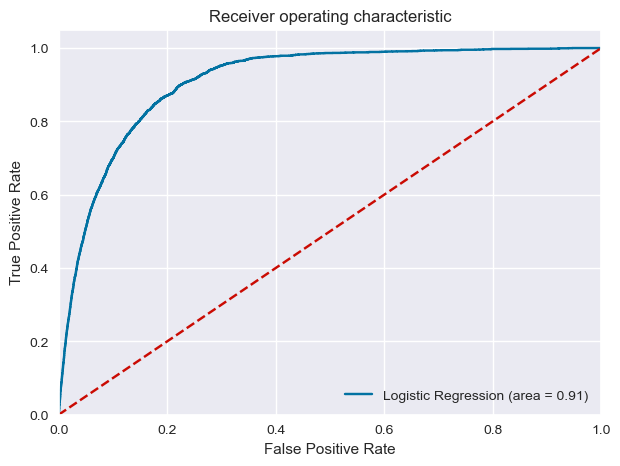

In [44]:
#ROC-AUC on training set
logit_roc_auc_train = roc_auc_score(y_train, lg2.predict(X_train2))
fpr, tpr, thresholds = roc_curve(y_train, lg2.predict(X_train2))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

The model is performing well on the training set.

In [45]:
# dropping variables from test set as well which were dropped from training set
X_test = X_test.drop(["personal_loan", "home_loan"], axis=1)

In [46]:
pred_test = lg2.predict(X_test) > 0.5
pred_test = np.round(pred_test)

In [47]:
print("Accuracy on training set : ", accuracy_score(y_train, pred_train2))
print("Accuracy on test set : ", accuracy_score(y_test, pred_test))

Accuracy on training set :  0.9017661959124189
Accuracy on test set :  0.8991174803659623


## Final Model Summary

The model is performing well on both the training and testing set. However, it is performing slightly better on the training set.

## Building a Decision Tree model

In [48]:
X = bank_data.drop(["subscribed"], axis=1)
y = bank_data["subscribed"]

In [49]:
# encoding the categorical variables
X = pd.get_dummies(X, drop_first=True)
X.head()

age  job  marital_status  education  defaulter  home_loan  personal_loan  \
0   56    3               1          0          0          0              0   
1   57    7               1          3          1          0              0   
2   37    7               1          3          0          2              0   
3   40    0               1          1          0          0              0   
4   56    7               1          3          0          0              2   

   communication_type  last_contacted  day_of_week  duration  cc_contact_freq  \
0                   1               6            1       261                1   
1                   1               6            1       149                1   
2                   1               6            1       226                1   
3                   1               6            1       151                1   
4                   1               6            1       307                1   

   consumer_price_index  euro_interbank_offer_rate  
0                93.994                      4.857  
1                93.994                      4.857  
2                93.994                      4.857  
3                93.994                      4.857  
4                93.994                      4.857

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

In [51]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [52]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [53]:
model = DecisionTreeClassifier(criterion="gini", random_state=1)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [54]:
#Checking model performance on training set
decision_tree_perf_train = model_performance_classification_sklearn(
    model, X_train, y_train
)
decision_tree_perf_train

Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

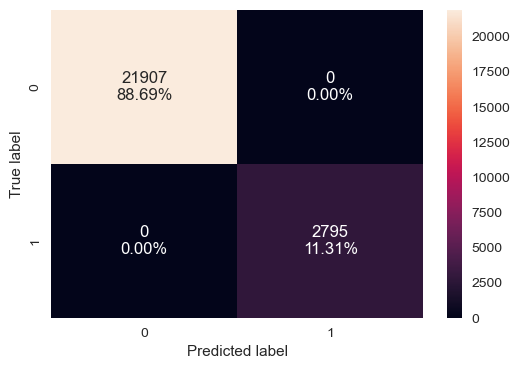

In [55]:
confusion_matrix_sklearn(model, X_train, y_train)

In [56]:
#Checking model performance on test set
decision_tree_perf_test = model_performance_classification_sklearn(
    model, X_test, y_test
)
decision_tree_perf_test

Accuracy    Recall  Precision        F1
0    0.8893  0.536374   0.504854  0.520137

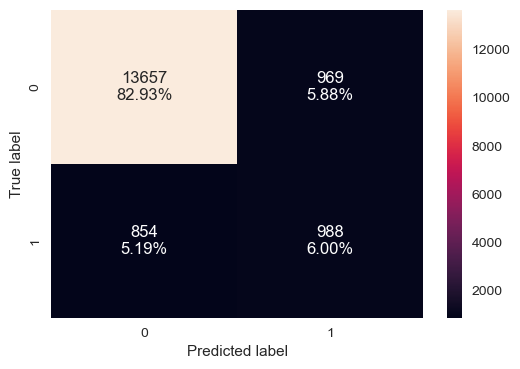

In [57]:
confusion_matrix_sklearn(model, X_test, y_test)

The model is performing very well on the training set, but not on the testing set.

In [58]:
column_names = list(X.columns)
feature_names = column_names
print(feature_names)

['age', 'job', 'marital_status', 'education', 'defaulter', 'home_loan', 'personal_loan', 'communication_type', 'last_contacted', 'day_of_week', 'duration', 'cc_contact_freq', 'consumer_price_index', 'euro_interbank_offer_rate']


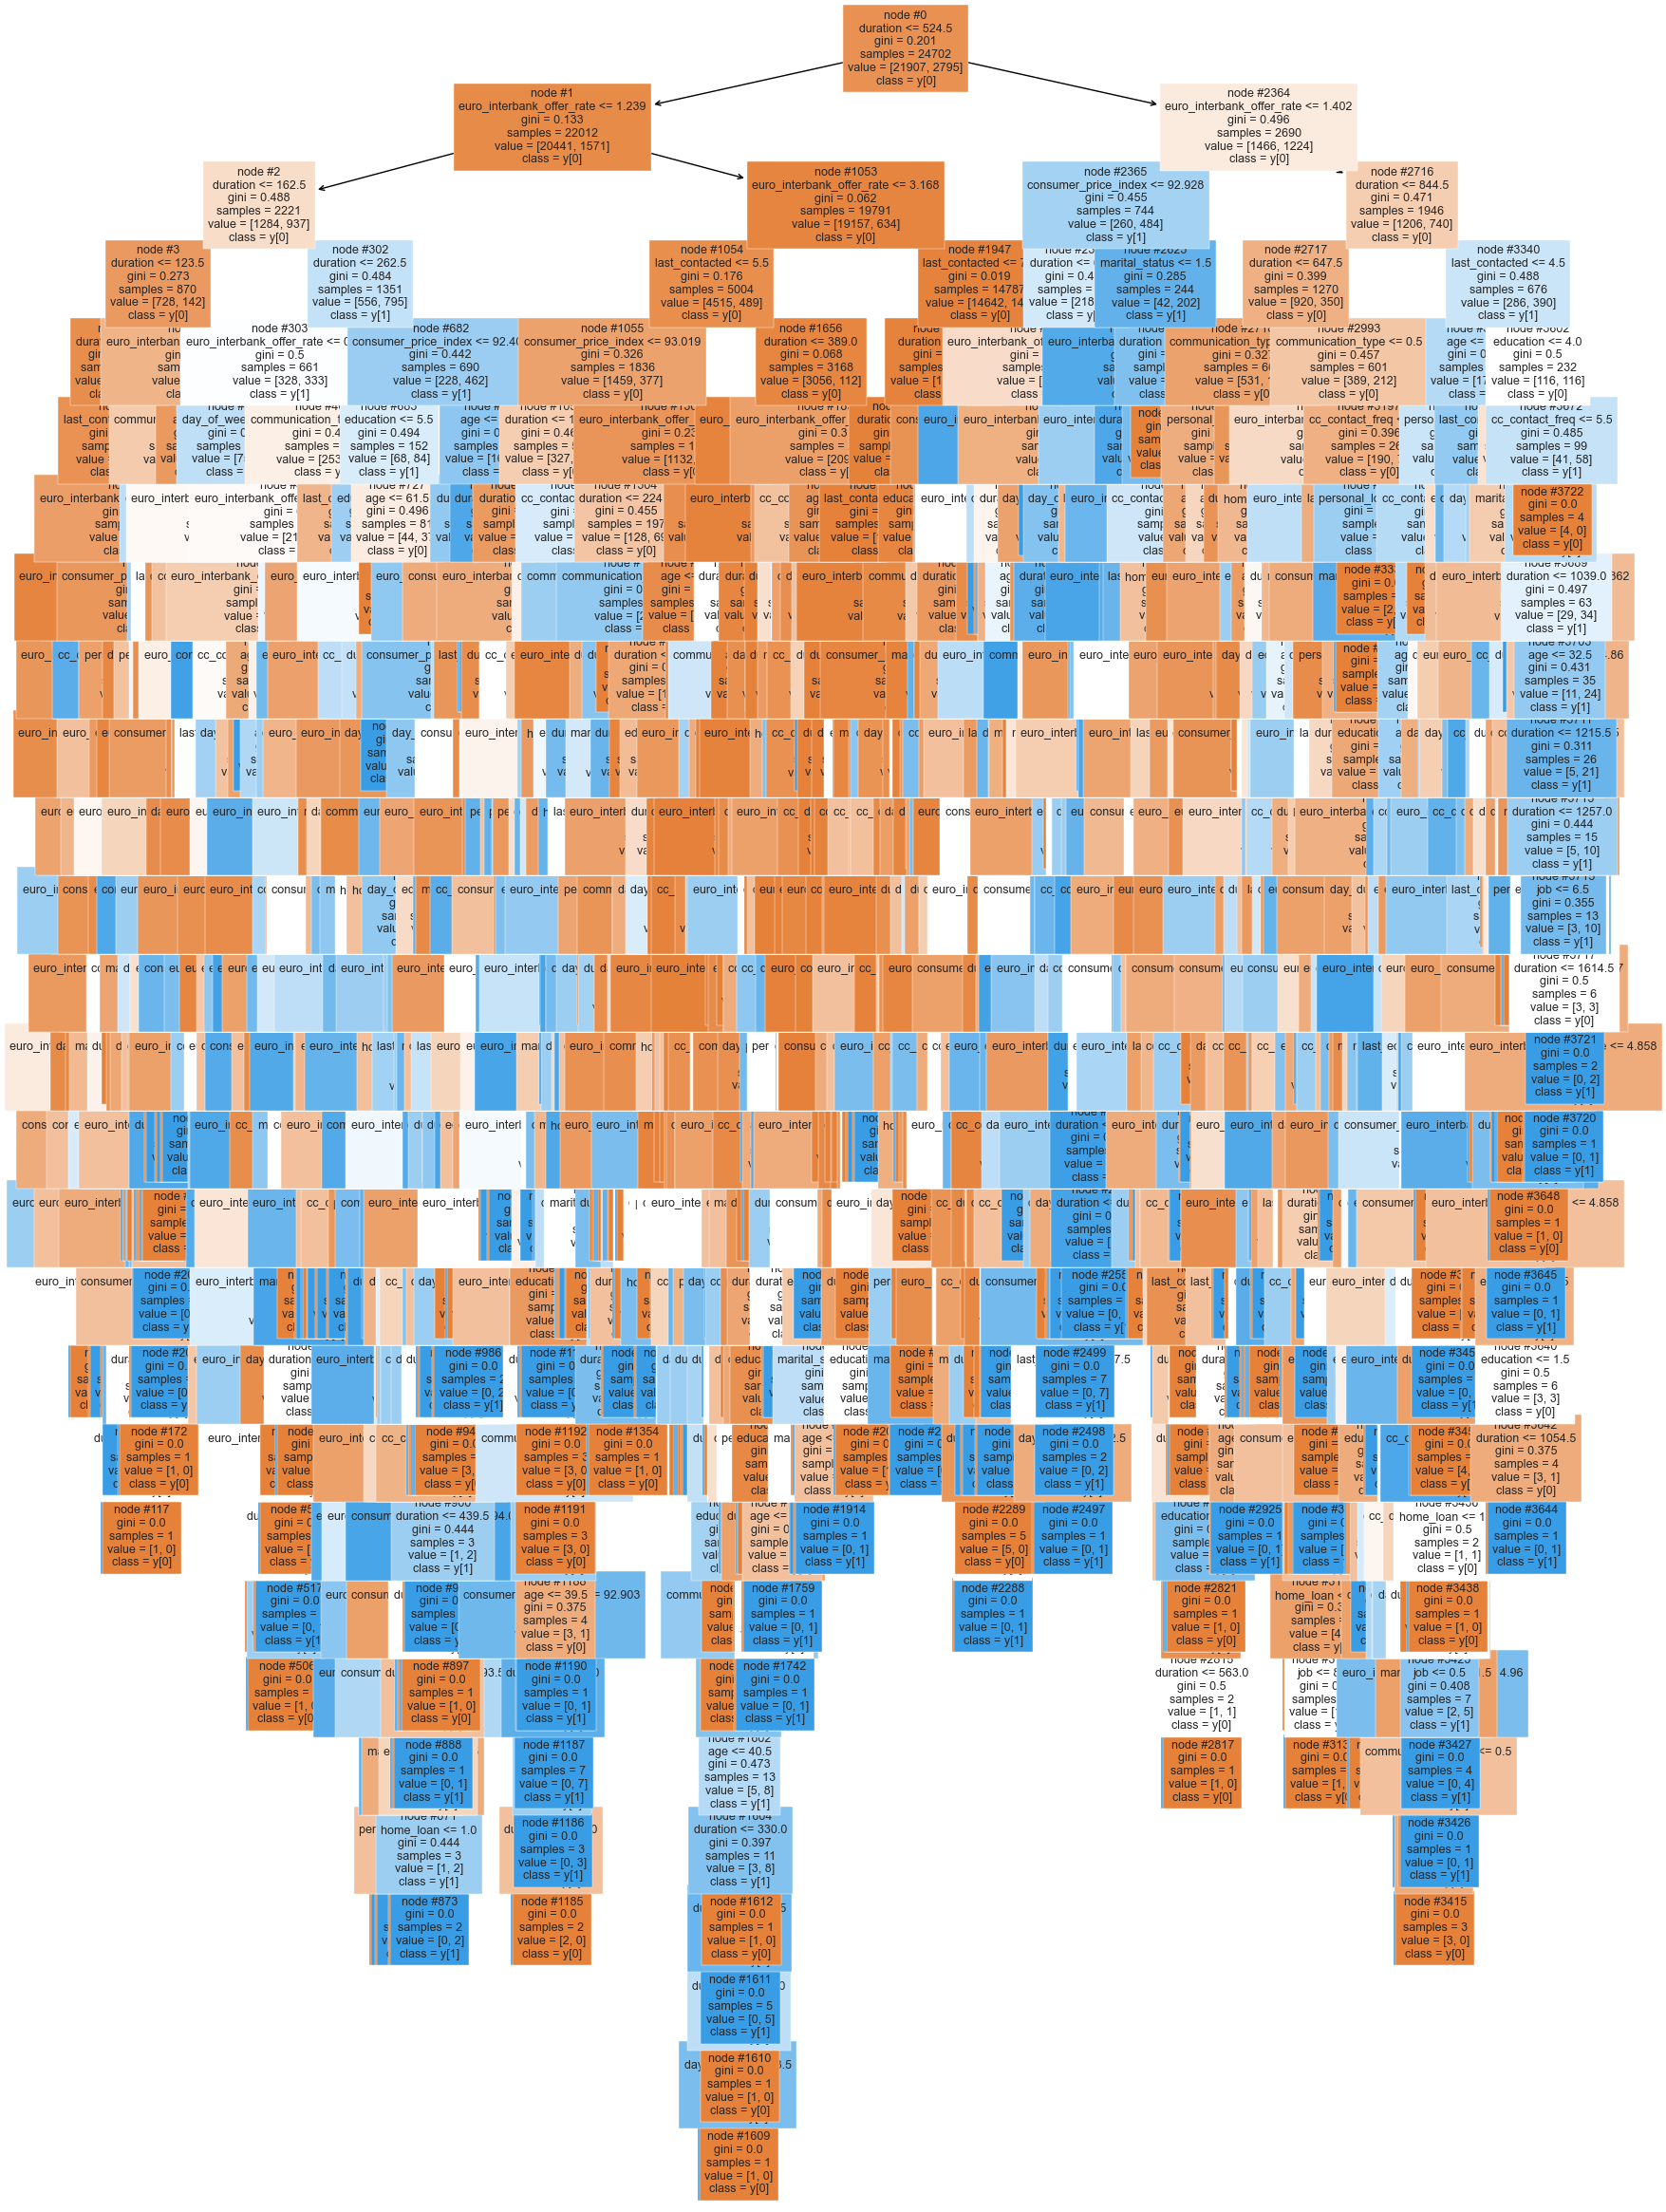

In [59]:
plt.figure(figsize=(20, 30))

out = tree.plot_tree(
    model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [60]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model, feature_names=feature_names, show_weights=True))

|--- duration <= 524.50
|   |--- euro_interbank_offer_rate <= 1.24
|   |   |--- duration <= 162.50
|   |   |   |--- duration <= 123.50
|   |   |   |   |--- duration <= 63.50
|   |   |   |   |   |--- weights: [135.00, 0.00] class: 0
|   |   |   |   |--- duration >  63.50
|   |   |   |   |   |--- last_contacted <= 6.50
|   |   |   |   |   |   |--- duration <= 98.50
|   |   |   |   |   |   |   |--- personal_loan <= 1.00
|   |   |   |   |   |   |   |   |--- duration <= 77.50
|   |   |   |   |   |   |   |   |   |--- age <= 55.00
|   |   |   |   |   |   |   |   |   |   |--- weights: [22.00, 0.00] class: 0
|   |   |   |   |   |   |   |   |   |--- age >  55.00
|   |   |   |   |   |   |   |   |   |   |--- age <= 56.50
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |   |   |   |   |   |--- age >  56.50
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [4.00, 0.00] class: 0
|   |   |   |   |   |   |   |   |--- duration >  77.50
|   |   

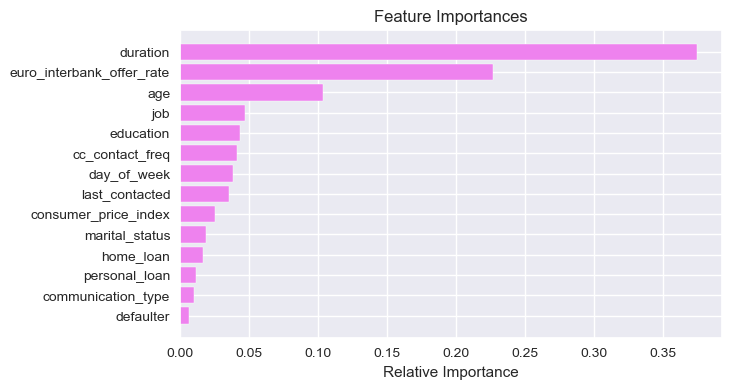

In [61]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(7, 4))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

Duration, Euro interbank offer rate and age are the top 3 important features.

## Do we need to prune the tree?

In [62]:
#We need to prune the tree
#Using GridSearch for Hyperparameter tuning of the tree model

estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from

parameters = {
    "max_depth": [np.arange(2, 50, 5), None],
    "criterion": ["entropy", "gini"],
    "splitter": ["best", "random"],
    "min_impurity_decrease": [0.000001, 0.00001, 0.0001],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(min_impurity_decrease=0.0001, random_state=1)

In [63]:
#Checking performance on training set
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    estimator, X_train, y_train
)
decision_tree_tune_perf_train

Accuracy    Recall  Precision        F1
0  0.927577  0.673703   0.682246  0.677948

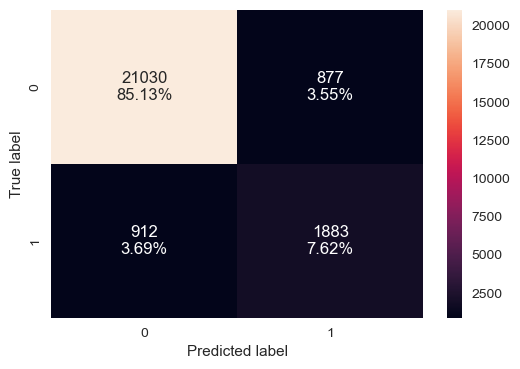

In [64]:
confusion_matrix_sklearn(estimator, X_train, y_train)

Accuracy, recall, precision and F1 values have dropped from the initial model.

In [65]:
#Checking model performance on test set
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    estimator, X_test, y_test
)

decision_tree_tune_perf_test

Accuracy    Recall  Precision        F1
0  0.907457  0.605863   0.583072  0.594249

Accuracy, recall, precision and F1 values have improved on the test set from the initial model.

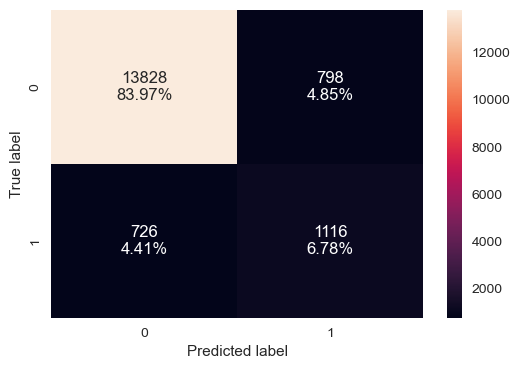

In [66]:
confusion_matrix_sklearn(estimator, X_test, y_test)

After hyperparameter tuning the model has performance has improved and become simpler.

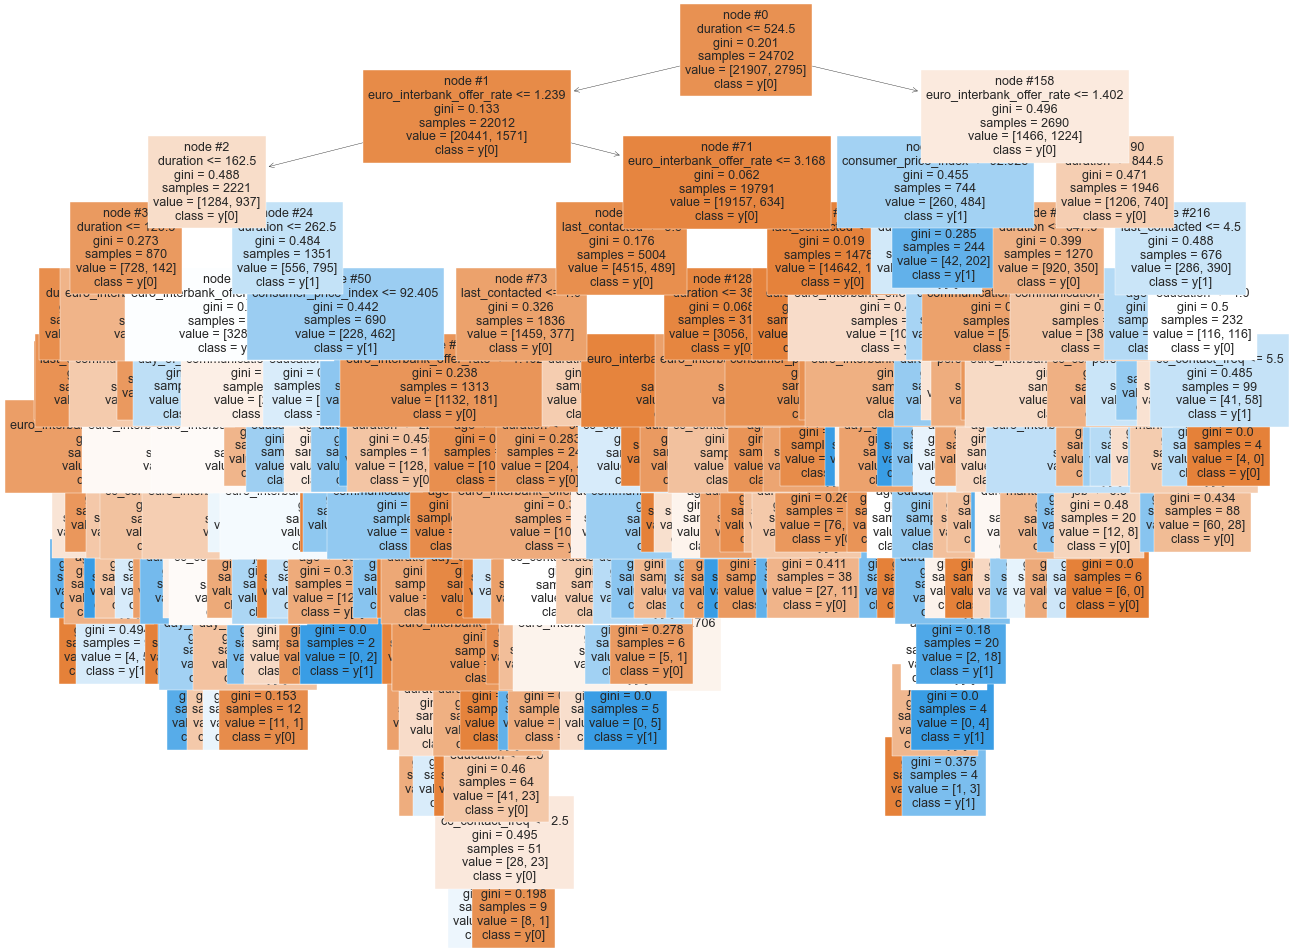

In [67]:
plt.figure(figsize=(15, 12))

tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
plt.show()

Got a slightly simplified tree after pre-pruning.

In [68]:
#Cost complexity pruning
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [69]:
pd.DataFrame(path)

ccp_alphas  impurities
0      0.000000    0.000000
1      0.000016    0.000078
2      0.000016    0.000159
3      0.000016    0.000240
4      0.000018    0.000402
..          ...         ...
783    0.002530    0.133380
784    0.003213    0.139806
785    0.007748    0.147554
786    0.024572    0.172127
787    0.028566    0.200692

[788 rows x 2 columns]

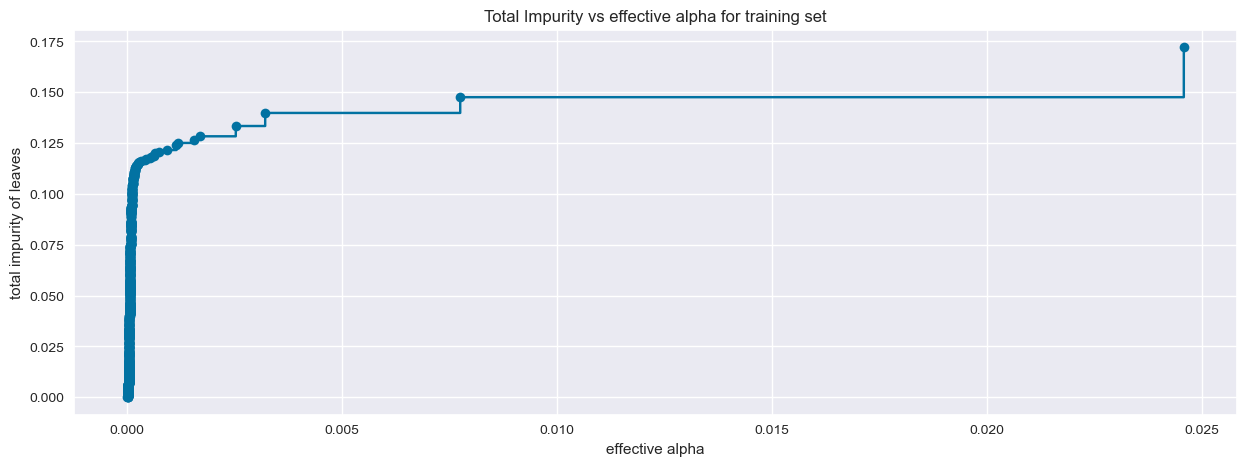

In [70]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [71]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.02856566808861491


For the remainder, we remove the last element in clfs and ccp_alphas, because it is the trivial tree with only one node. The number of nodes and tree depth decreases as alpha increases.

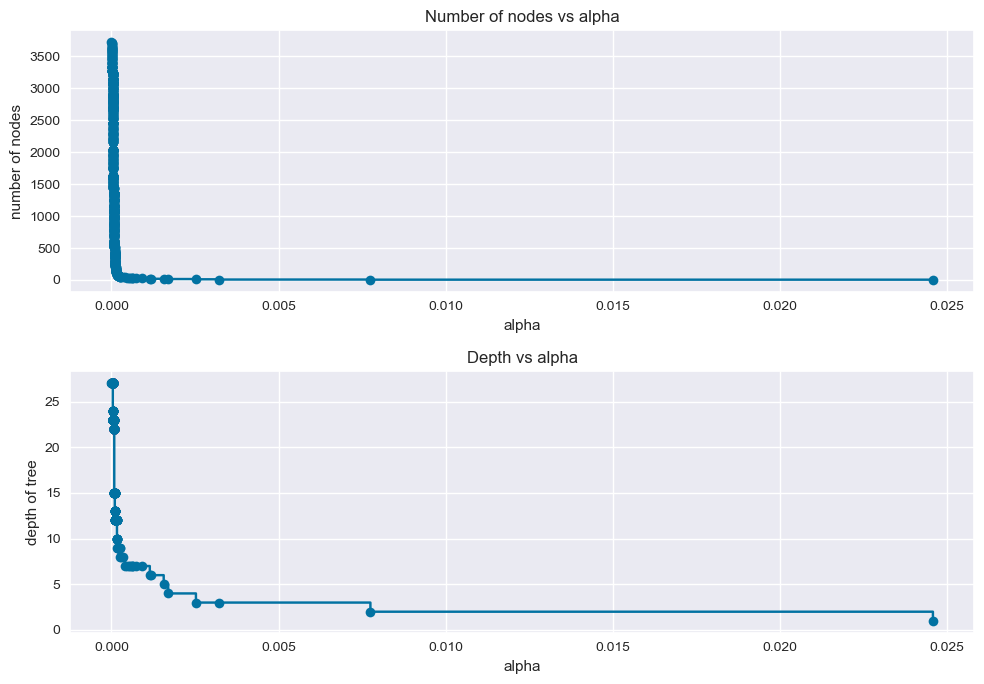

In [72]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [73]:
#Recall vs alpha for training and testing sets
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

In [74]:
recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

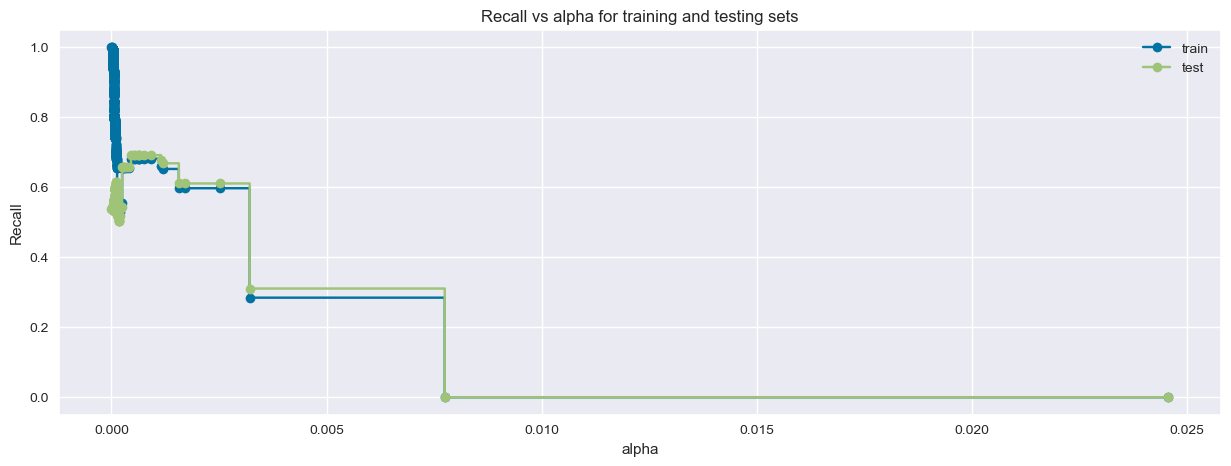

In [75]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [76]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.00045312125019571214, random_state=1)


In [77]:
#Checking model performance on training set
decision_tree_postpruned_perf_train = model_performance_classification_sklearn(
    best_model, X_train, y_train
)
decision_tree_postpruned_perf_train

Accuracy    Recall  Precision        F1
0  0.912882  0.681574   0.601516  0.639047

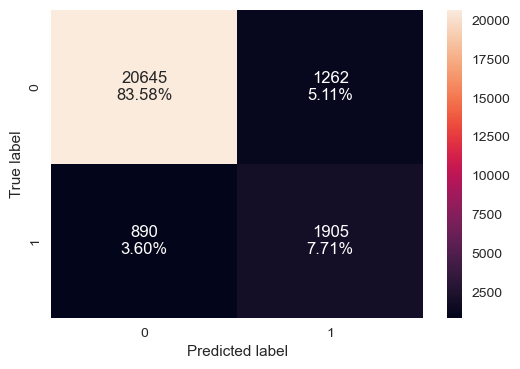

In [78]:
confusion_matrix_sklearn(best_model, X_train, y_train)

In [79]:
#Checking model performance on test set
decision_tree_postpruned_perf_test = model_performance_classification_sklearn(
    best_model, X_test, y_test
)
decision_tree_postpruned_perf_test

Accuracy   Recall  Precision        F1
0  0.908671  0.69164   0.576471  0.628825

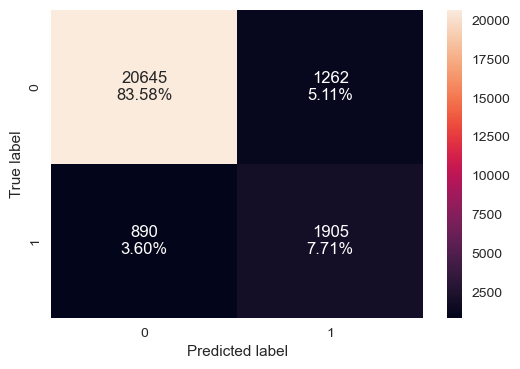

In [80]:
confusion_matrix_sklearn(best_model, X_train, y_train)

With post-pruning, there's better performance on both training and test set. The recall has improved further.

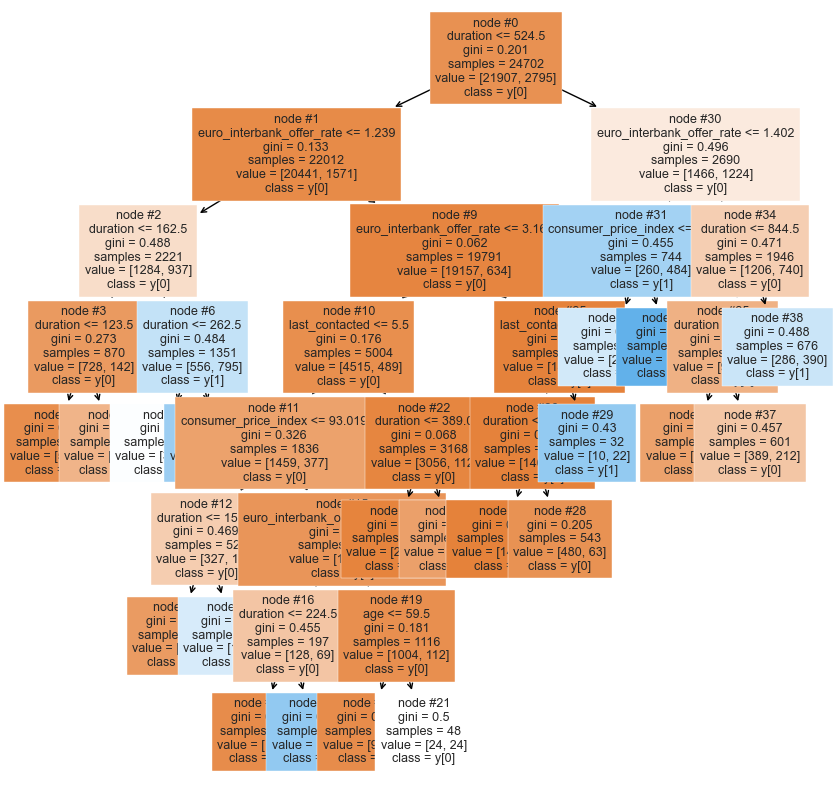

In [81]:
#Visualizing the tree
plt.figure(figsize=(10, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()
plt.show()

In [82]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- duration <= 524.50
|   |--- euro_interbank_offer_rate <= 1.24
|   |   |--- duration <= 162.50
|   |   |   |--- duration <= 123.50
|   |   |   |   |--- weights: [504.00, 51.00] class: 0
|   |   |   |--- duration >  123.50
|   |   |   |   |--- weights: [224.00, 91.00] class: 0
|   |   |--- duration >  162.50
|   |   |   |--- duration <= 262.50
|   |   |   |   |--- weights: [328.00, 333.00] class: 1
|   |   |   |--- duration >  262.50
|   |   |   |   |--- weights: [228.00, 462.00] class: 1
|   |--- euro_interbank_offer_rate >  1.24
|   |   |--- euro_interbank_offer_rate <= 3.17
|   |   |   |--- last_contacted <= 5.50
|   |   |   |   |--- consumer_price_index <= 93.02
|   |   |   |   |   |--- duration <= 155.50
|   |   |   |   |   |   |--- weights: [204.00, 42.00] class: 0
|   |   |   |   |   |--- duration >  155.50
|   |   |   |   |   |   |--- weights: [123.00, 154.00] class: 1
|   |   |   |   |--- consumer_price_index >  93.02
|   |   |   |   |   |--- euro_interbank_offer_rate <= 1.

In [83]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        best_model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                Imp
duration                   0.544937
euro_interbank_offer_rate  0.369312
last_contacted             0.046690
consumer_price_index       0.031320
age                        0.007741
job                        0.000000
marital_status             0.000000
education                  0.000000
defaulter                  0.000000
home_loan                  0.000000
personal_loan              0.000000
communication_type         0.000000
day_of_week                0.000000
cc_contact_freq            0.000000


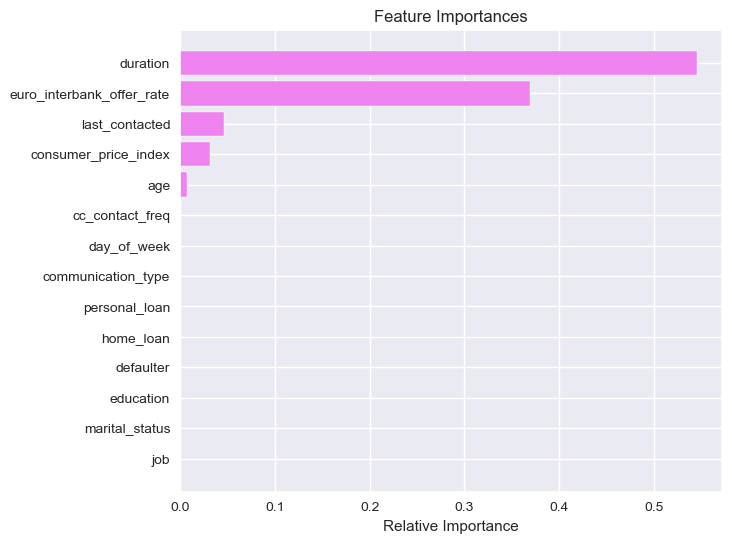

In [84]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(7, 6))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

Duration, Euro interbank offer rate remain the most important features with post-pruning too with the customer last contacted month displacing the client's age as an important feature after post pruning.

## Model Performance Comparison and Conclusions

In [85]:
#Comparing all the decision tree models
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_postpruned_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Decision Tree sklearn  Decision Tree (Pre-Pruning)  \
Accuracy                     1.0                     0.927577   
Recall                       1.0                     0.673703   
Precision                    1.0                     0.682246   
F1                           1.0                     0.677948   

           Decision Tree (Post-Pruning)  
Accuracy                       0.912882  
Recall                         0.681574  
Precision                      0.601516  
F1                             0.639047

In [86]:
# test performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_postpruned_perf_test.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
models_train_comp_df

Test set performance comparison:


Decision Tree sklearn  Decision Tree (Pre-Pruning)  \
Accuracy                0.889300                     0.907457   
Recall                  0.536374                     0.605863   
Precision               0.504854                     0.583072   
F1                      0.520137                     0.594249   

           Decision Tree (Post-Pruning)  
Accuracy                       0.908671  
Recall                         0.691640  
Precision                      0.576471  
F1                             0.628825

- The decision tree with post pruning yields the highest recall and accuracy on the test set.
- The tree with post pruning is less complex and easier to interpret than that of pre-pruning.

## K-means Clustering

In [88]:
# Subseting the data
subset_bank_data = bank_data.drop("subscribed", axis=1)

In [91]:
subset_bank_data.columns

Index(['age', 'job', 'marital_status', 'education', 'defaulter', 'home_loan',
       'personal_loan', 'communication_type', 'last_contacted', 'day_of_week',
       'duration', 'cc_contact_freq', 'consumer_price_index',
       'euro_interbank_offer_rate'],
      dtype='object')

In [94]:
num_col = (["duration", "euro_interbank_offer_rate", "last_contacted", "consumer_price_index", "age"])

Number of Clusters: 1 	Average Distortion: 172.71431670963344
Number of Clusters: 2 	Average Distortion: 112.13306178777178
Number of Clusters: 3 	Average Distortion: 84.21296776076947
Number of Clusters: 4 	Average Distortion: 66.8598060508318
Number of Clusters: 5 	Average Distortion: 58.509452520275254
Number of Clusters: 6 	Average Distortion: 50.14459544459813
Number of Clusters: 7 	Average Distortion: 45.3116490471203
Number of Clusters: 8 	Average Distortion: 40.91214859767025


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

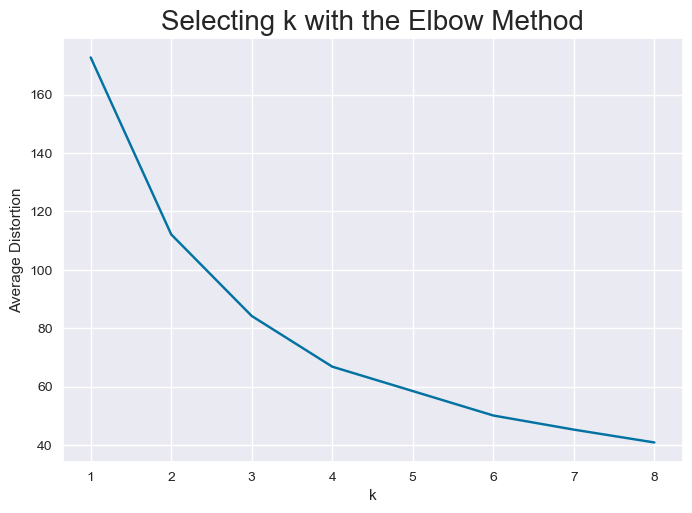

In [95]:
clusters = range(1, 9)
meanDistortions = []  # Create a empty list

for k in clusters:
    model = KMeans(n_clusters=k)  # Initialize KMeans
    model.fit(subset_bank_data)  # Fit kMeans on the data
    prediction = model.predict(subset_bank_data)  # Predict the model on the data
    distortion = (
        sum(np.min(cdist(subset_bank_data, model.cluster_centers_, "euclidean"), axis=1))
        / subset_bank_data.shape[0]  # Find distortion
    )

    meanDistortions.append(
        distortion
    )  # Append distortion values to the empty list created above

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")  # Title of X-axis
plt.ylabel("Average Distortion")  # Title of y-axis
plt.title("Selecting k with the Elbow Method", fontsize=20)  # Title of the plot

In the above plot, the elbow is seen for K=2, 3, 4 and 6.

In [107]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(subset_bank_data)

KMeans(n_clusters=3, random_state=0)

In [108]:
# adding kmeans cluster labels to the original dataframe
bank_data["K_means_segments"] = kmeans.labels_

## Cluster profiles

In [109]:
cluster_profile = bank_data.groupby("K_means_segments").mean()

In [110]:
cluster_profile["count_in_each_segment"] = (
    bank_data.groupby("K_means_segments")["age"].count().values
)

In [111]:
# Displaying cluster profiles
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

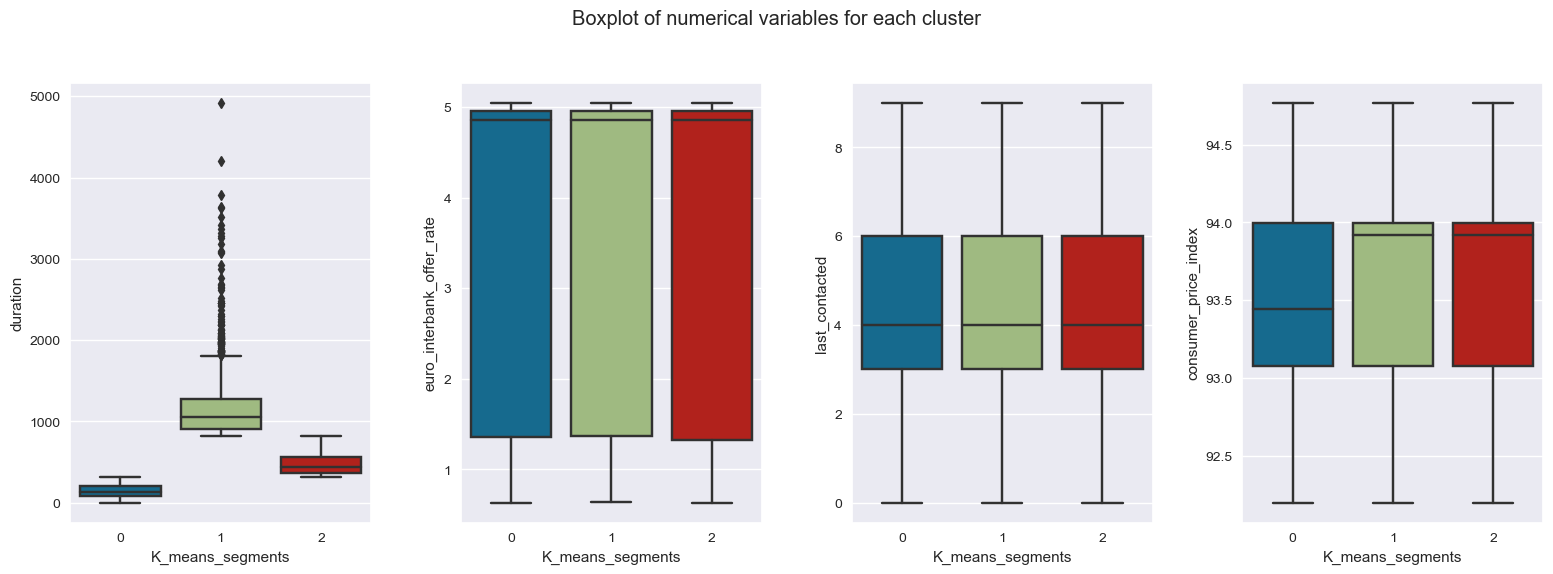

In [112]:
fig, axes = plt.subplots(1, 4, figsize=(16, 6))
fig.suptitle("Boxplot of numerical variables for each cluster")
counter = 0
for ii in range(4):
    sns.boxplot(ax=axes[ii], y=bank_data[num_col[counter]], x=bank_data["K_means_segments"])
    counter = counter + 1

fig.tight_layout(pad=2.0)

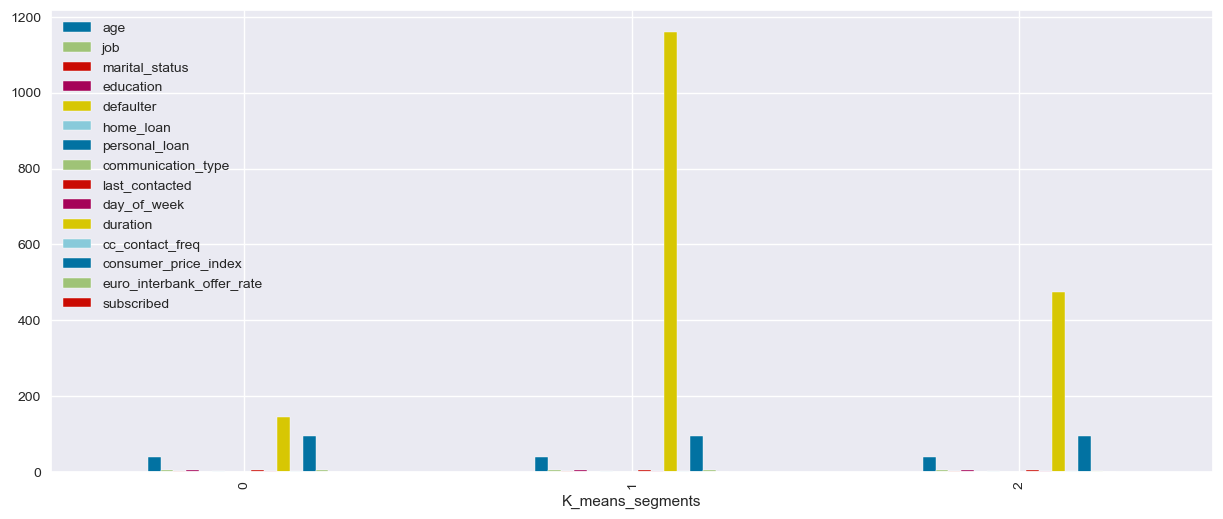

In [113]:
bank_data.groupby("K_means_segments").mean().plot.bar(figsize=(15, 6));

## Actionable Insights and Recommendations

- Who are the profitable customers for the bank?
- What recommedations would you suggest to the bank?
- Which customers belong to which cluster? What kind of recommendations could you provide to those in the cluster who did not subscribe?

**The profitable customers for the bank are those in cluster 1. These customers are the ones that subscribed to the term deposit. 

**Insights: It appears that the Euro interbank offer rate, consumer price index, last contacted month and the customer's age are not a very important factor as to whether a customers will subscribe to a term deposit or not as all 3 clusters are made up or customers's within the same age bracket. The most important factor for the bank to consider will be the contact duration. Customers who were contacted for longer are most likely to subscribe to the term deposit. In order words, it is very important for the bank to engage its target customers for a lengthy amount of time. This seems to assure the customers of the bank's commitment to them and leveraging on that will most likely cause more customers to subscribe to it's term deposits in the current campaign.  

**Cluster 0:
There are 30414 customers in this cluster. It has the highest number of customers that will most likely not subscribe to the term deposit with the lowest contact duration. 

**Cluster 1: 
There are 1661 customers in this cluster. It has the highest number of customers that will most likely subscribe to the term deposit with the highest contact duration. 

**Cluster 2:
There are 9095 customers in this cluster. It has the highest number of customers that are likely subscribe to the term deposit. 

**Recommendations: 
For the bank to secure better deposits, it should increase it's contact duration for customers in both clusters 0 and 2. This will lead to better engagement with the customers and encourage them to subscribe for the term deposits leading to better profitability for the bank overall.
